In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Read data

In [2]:
df_master = pd.read_csv('14-06-2022/master.csv')
df_master['branch'] = 'master'

df_new = pd.read_csv('14-06-2022/new-algorithm-d10us.csv')
df_new['branch'] = 'new-algorithm-d10us'

df = pd.concat([df_master, df_new], ignore_index = True)
df.sample(10)

,name,cpu_time_us,package_energy,core_energy,branch
464,Life - parallel bridge generation,5335755,5105022,625517,master
86,NBody parallel reduce,163587,249331,45301,master
402,Life - sequential generation,60197,364407,6545,master
861,FrogJump,1176213,2282749,385371,new-algorithm-d10us
629,Travelling Salesman Problem,6522,0,1739,new-algorithm-d10us
941,FrogJump,1189494,2280979,370129,new-algorithm-d10us
546,NBody parallel reduce,147461,280823,39931,new-algorithm-d10us
411,FrogJump,953182,1777969,178381,master
791,FrogJump,1133301,2262227,253222,new-algorithm-d10us
996,NBody parallel reduce,151826,252062,50122,new-algorithm-d10us


## Remove outliers

In [3]:
q_low = df["cpu_time_us"].quantile(0.01)
q_hi  = df["cpu_time_us"].quantile(0.99)
df = df[(df["cpu_time_us"] < q_hi) & (df["cpu_time_us"] > q_low)]

q_low = df["package_energy"].quantile(0.01)
q_hi  = df["package_energy"].quantile(0.99)
df = df[(df["package_energy"] < q_hi) & (df["package_energy"] > q_low)]

q_low = df["core_energy"].quantile(0.01)
q_hi  = df["core_energy"].quantile(0.99)
df = df[(df["core_energy"] < q_hi) & (df["core_energy"] > q_low)]

df.sample(10)

,name,cpu_time_us,package_energy,core_energy,branch
64,Life - parallel bridge generation,4438601,5018951,581162,master
668,QuickSort,83124,110712,19316,new-algorithm-d10us
679,Travelling Salesman Problem,6354,11794,2015,new-algorithm-d10us
228,QuickSort,84071,113901,11307,master
462,Life - sequential generation,56067,365719,6927,master
542,Life - sequential generation,136722,619078,186346,new-algorithm-d10us
254,Life - parallel bridge generation,5441031,5052320,662197,master
736,NBody parallel reduce,150948,242617,47406,new-algorithm-d10us
815,NBody parallel iterator,42479,130258,17928,new-algorithm-d10us
148,QuickSort,73632,107630,10666,master


## Normalize data

In [4]:
def extract_means(input_df):
    means = {'name': [],
             'branch': [],
             'cpu_time_us': [],
             'core_energy': [],
             'package_energy': []}

    for algorithm in set(input_df['name']):
        algorithm_df = input_df[input_df['name'] == algorithm]
        means['name'].append(algorithm)
        means['branch'].append(algorithm_df['branch'].values[0])
        means['cpu_time_us'].append(algorithm_df['cpu_time_us'].mean())
        means['core_energy'].append(algorithm_df['core_energy'].mean())
        means['package_energy'].append(algorithm_df['package_energy'].mean())
    
    return means


master_dict = extract_means(df_master)
new_algorithm_dict = extract_means(df_new)
means = {'name': [], 
         'cpu_time_ratio': [],
         'core_energy_ratio': [],
         'package_energy_ratio': []}

for index, algorithm in enumerate(master_dict['name']):
    means['name'].append(algorithm)
    means['cpu_time_ratio'].append(master_dict['cpu_time_us'][index] / new_algorithm_dict['cpu_time_us'][index])
    means['core_energy_ratio'].append(master_dict['core_energy'][index] / new_algorithm_dict['core_energy'][index])
    means['package_energy_ratio'].append(master_dict['package_energy'][index] / new_algorithm_dict['package_energy'][index])

df_to_plot = pd.DataFrame(data=means)
display(df)


,name,cpu_time_us,package_energy,core_energy,branch
0,MergeSort,16859950,19231397,1789549,master
1,FrogJump,1019353,2099562,203771,master
2,Life - sequential generation,59547,502614,124628,master
3,Life - parallel iterators generation,154387,223225,25985,master
4,Life - parallel bridge generation,4923843,5134698,678813,master
...,...,...,...,...,...
995,NBody parallel iterator,44244,105356,15182,new-algorithm-d10us
996,NBody parallel reduce,151826,252062,50122,new-algorithm-d10us
997,NBody sequential,70219,331923,116983,new-algorithm-d10us
998,QuickSort,79643,124643,23863,new-algorithm-d10us


## CPU time

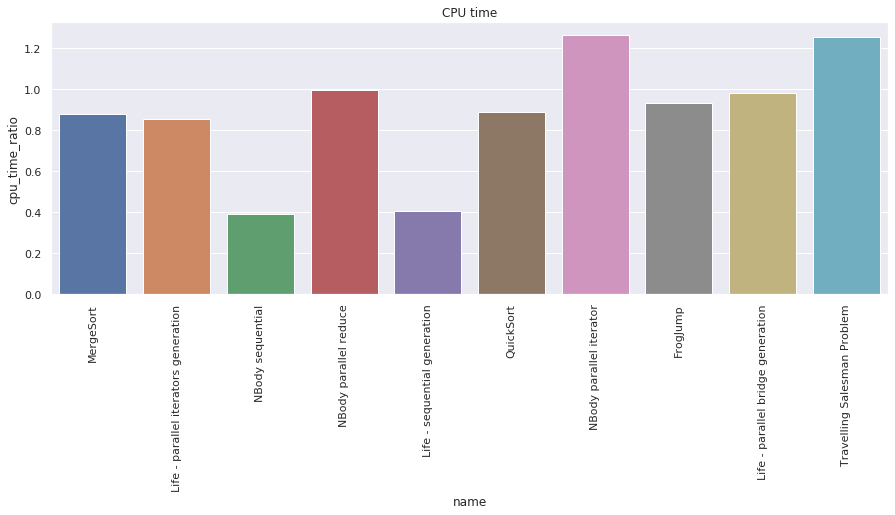

In [5]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('CPU time')
ax1.set_ylabel('Active time [us]')
ax1.set_xlabel('Algorithm')

#sns.barplot(x='name', y='cpu_time_us', hue='branch', data=df_to_plot);
sns.barplot(x='name', y='cpu_time_ratio', data=df_to_plot);
plt.xticks(rotation=90);

# x < 1: we are losing
# x > 1: we are winning

## Energy

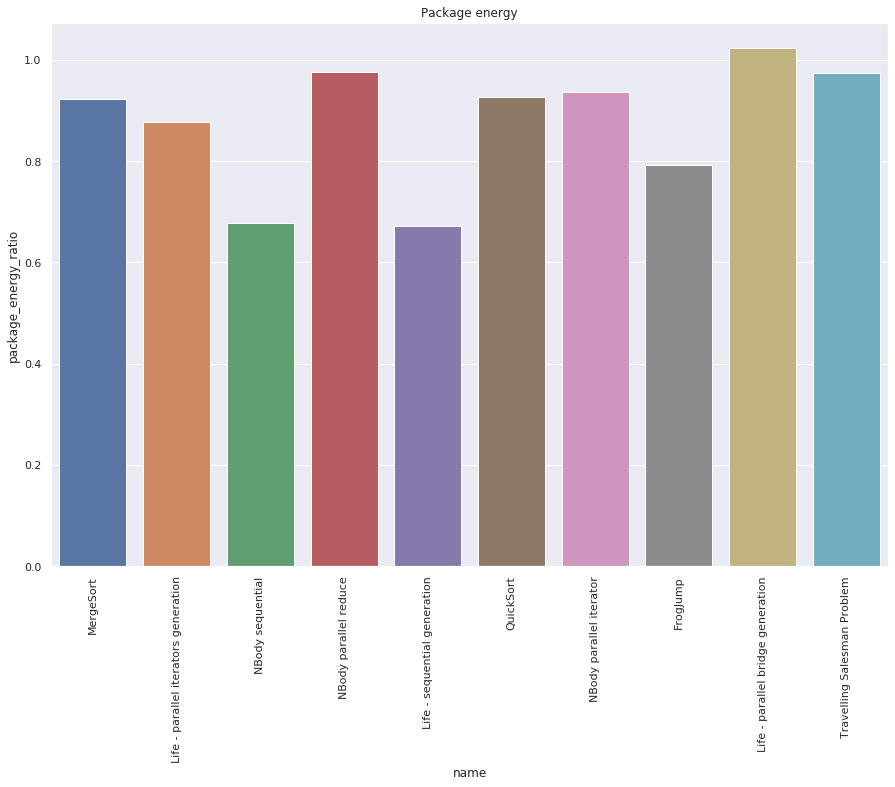

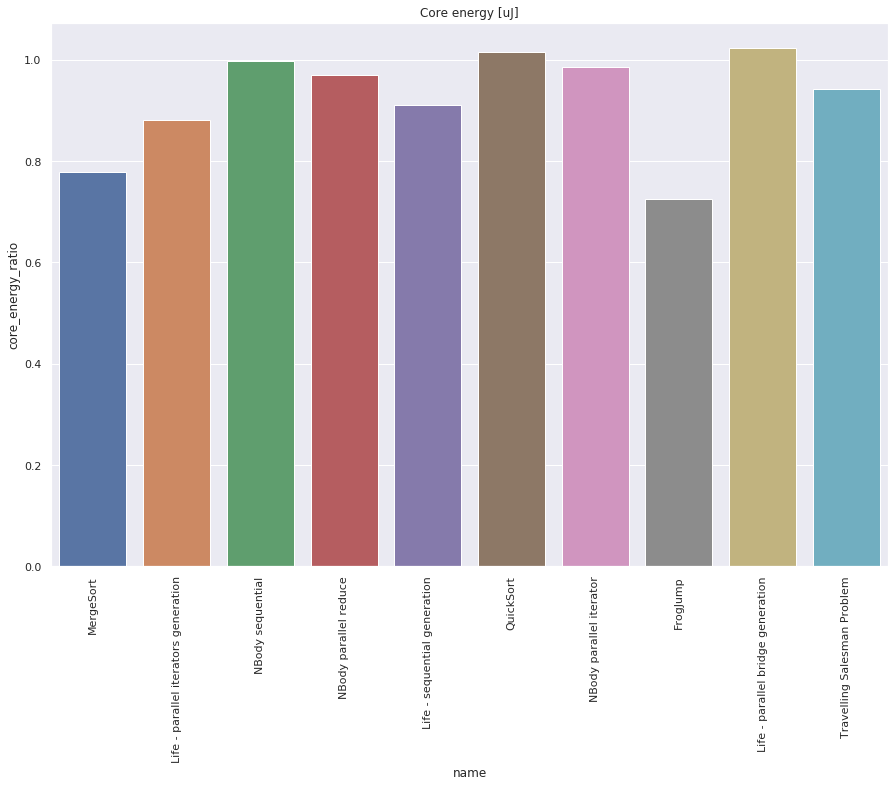

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(15, 10));

ax2.set_title('Package energy')
ax2.set_ylabel('Energy [uJ]')
ax2.set_xlabel('Sleep duration [us]')
sns.barplot(x='name', y='package_energy_ratio', data=df_to_plot);
plt.xticks(rotation=90);

fig2, ax3 = plt.subplots(1, figsize=(15, 10));

ax3.set_title('Core energy [uJ]')
ax3.set_ylabel('Energy [uJ]')
ax3.set_xlabel('Sleep duration [us]')
sns.barplot(x='name', y='core_energy_ratio', data=df_to_plot);

plt.xticks(rotation=90);